In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print('Numpy version: ' + np.__version__)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)

Numpy version: 1.23.5
Pandas version: 1.5.3
Matplotlib version: 3.7.1


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data = pd.read_csv('/content/drive/MyDrive/Finashka/USDCAD.csv')
data

,Local time,Open,High,Low,Close,Volume
0,31.12.2019 03:00:00.000 GMT+0300,1.30610,1.30612,1.29514,1.29853,79491.7969
1,01.01.2020 03:00:00.000 GMT+0300,1.29842,1.29863,1.29745,1.29754,3984.2600
2,02.01.2020 03:00:00.000 GMT+0300,1.29754,1.30078,1.29684,1.29836,128121.9688
3,03.01.2020 03:00:00.000 GMT+0300,1.29836,1.30072,1.29608,1.29972,104812.5625
4,04.01.2020 03:00:00.000 GMT+0300,1.29972,1.29972,1.29972,1.29972,0.0000
...,...,...,...,...,...,...
1366,27.09.2023 03:00:00.000 GMT+0300,1.35189,1.35427,1.34923,1.35004,120282.7994
1367,28.09.2023 03:00:00.000 GMT+0300,1.35001,1.35158,1.34702,1.34906,145223.5202
1368,29.09.2023 03:00:00.000 GMT+0300,1.34908,1.35844,1.34163,1.35749,140392.2903
1369,30.09.2023 03:00:00.000 GMT+0300,1.35749,1.35749,1.35749,1.35749,0.0000


In [46]:
data.rename(index=str, columns={'Local time': 'datetime'}, inplace=True)
data.head()

,datetime,Open,High,Low,Close,Volume
0,31.12.2019 03:00:00.000 GMT+0300,1.30610,1.30612,1.29514,1.29853,79491.7969
1,01.01.2020 03:00:00.000 GMT+0300,1.29842,1.29863,1.29745,1.29754,3984.2600
2,02.01.2020 03:00:00.000 GMT+0300,1.29754,1.30078,1.29684,1.29836,128121.9688
3,03.01.2020 03:00:00.000 GMT+0300,1.29836,1.30072,1.29608,1.29972,104812.5625
4,04.01.2020 03:00:00.000 GMT+0300,1.29972,1.29972,1.29972,1.29972,0.0000


In [47]:
for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 datetime : 0.0%
 Open : 0.0%
 High : 0.0%
 Low : 0.0%
 Close : 0.0%
 Volume : 0.0%


In [48]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["datetime"]

0      2019-12-31 03:00:00-03:00
1      2020-01-01 03:00:00-03:00
2      2020-02-01 03:00:00-03:00
3      2020-03-01 03:00:00-03:00
4      2020-04-01 03:00:00-03:00
                  ...           
1366   2023-09-27 03:00:00-03:00
1367   2023-09-28 03:00:00-03:00
1368   2023-09-29 03:00:00-03:00
1369   2023-09-30 03:00:00-03:00
1370   2023-01-10 03:00:00-03:00
Name: datetime, Length: 1371, dtype: datetime64[ns, pytz.FixedOffset(-180)]

In [49]:
data[data["Volume"]==0]

,datetime,Open,High,Low,Close,Volume
4,2020-04-01 03:00:00-03:00,1.29972,1.29972,1.29972,1.29972,0.0
11,2020-11-01 03:00:00-03:00,1.30492,1.30492,1.30492,1.30492,0.0
18,2020-01-18 03:00:00-03:00,1.30639,1.30639,1.30639,1.30639,0.0
25,2020-01-25 03:00:00-03:00,1.31428,1.31428,1.31428,1.31428,0.0
32,2020-01-02 03:00:00-03:00,1.32347,1.32347,1.32347,1.32347,0.0
...,...,...,...,...,...,...
1341,2023-02-09 03:00:00-03:00,1.35873,1.35873,1.35873,1.35873,0.0
1348,2023-09-09 03:00:00-03:00,1.36354,1.36354,1.36354,1.36354,0.0
1355,2023-09-16 03:00:00-03:00,1.35213,1.35213,1.35213,1.35213,0.0
1362,2023-09-23 03:00:00-03:00,1.34783,1.34783,1.34783,1.34783,0.0


In [50]:
data = data.loc[(data['Volume'] != 0)]
data

,datetime,Open,High,Low,Close,Volume
0,2019-12-31 03:00:00-03:00,1.30610,1.30612,1.29514,1.29853,79491.7969
1,2020-01-01 03:00:00-03:00,1.29842,1.29863,1.29745,1.29754,3984.2600
2,2020-02-01 03:00:00-03:00,1.29754,1.30078,1.29684,1.29836,128121.9688
3,2020-03-01 03:00:00-03:00,1.29836,1.30072,1.29608,1.29972,104812.5625
5,2020-05-01 03:00:00-03:00,1.29868,1.29896,1.29848,1.29891,3763.5801
...,...,...,...,...,...,...
1365,2023-09-26 03:00:00-03:00,1.34504,1.35279,1.34495,1.35192,124181.4607
1366,2023-09-27 03:00:00-03:00,1.35189,1.35427,1.34923,1.35004,120282.7994
1367,2023-09-28 03:00:00-03:00,1.35001,1.35158,1.34702,1.34906,145223.5202
1368,2023-09-29 03:00:00-03:00,1.34908,1.35844,1.34163,1.35749,140392.2903


In [51]:
data[data["High"]==data["Low"]]

,datetime,Open,High,Low,Close,Volume


<Axes: xlabel='Close'>

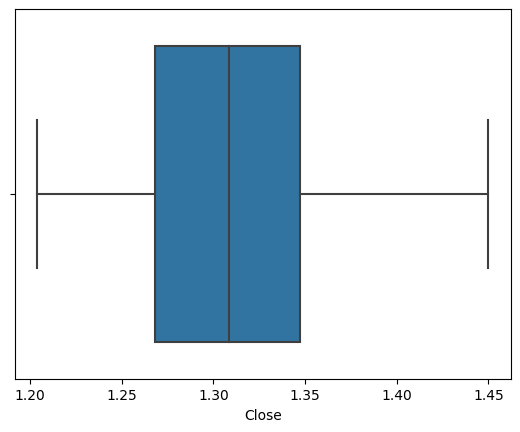

In [52]:
sns.boxplot(x = data['Close'])

<ipython-input-53-4f497bd1ee33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap = 'flare', ax=ax);


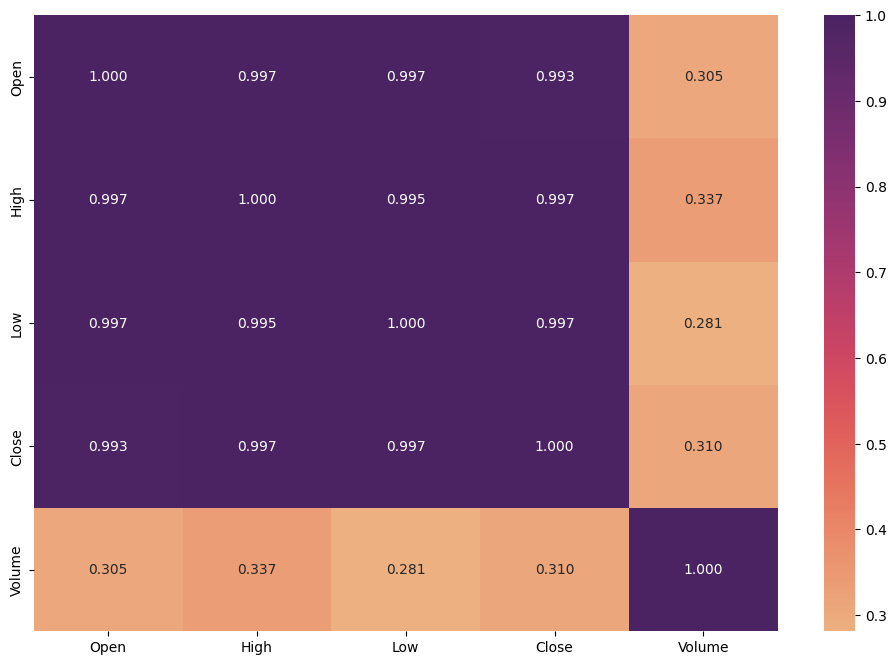

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap = 'flare', ax=ax);

In [54]:
X = data['datetime'].astype(int).values.reshape(-1, 1)  # Convert date to timestamp
y = data['Close'].values  # Assuming the column name is USDCNY, adjust if it's different

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [57]:
predictions = model.predict(X_test)

In [58]:
Results = pd.DataFrame(data=y_test)
Results["Predicted Return"] = predictions
Results

,0,Predicted Return
0,1.24744,1.305735
1,1.20616,1.305960
2,1.27553,1.308638
3,1.30818,1.303525
4,1.28690,1.309013
...,...,...
230,1.32217,1.301718
231,1.27298,1.309519
232,1.33208,1.302766
233,1.34783,1.313995


array([<Axes: >, <Axes: >], dtype=object)

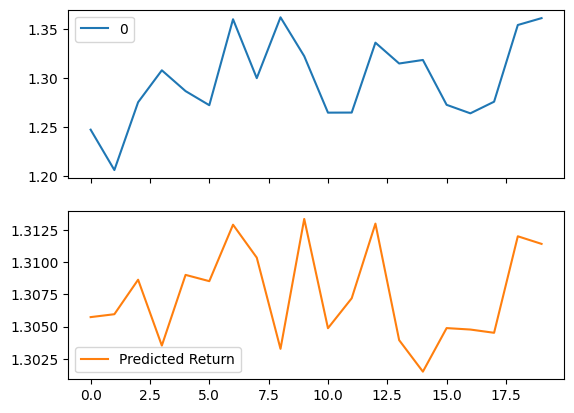

In [59]:
Results[:20].plot(subplots=True)

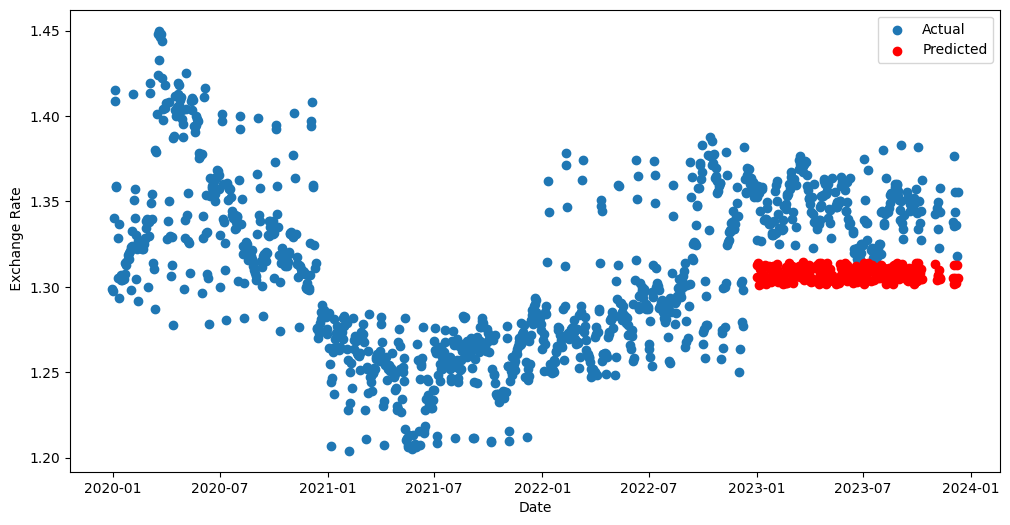

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(data['datetime'], data['Close'], label='Actual')
plt.scatter(data['datetime'][len(X_train):], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel(' Exchange Rate')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(
    Results[0],
    Results["Predicted Return"]
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.04857292110429232


In [63]:
# Construct a dataframe using just the "y" training data:
in_sample_results = pd.DataFrame(data=y_train)

# Add a column of "in-sample" predictions to that dataframe:
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results[0],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.04871805864142306
